# Week 6- Machine Learning

**Objectives**: Today we are going to work with some basic machine learning algorithms. Machine learning is a rich and exciting area of computer science that is often considered a subset of the broader field of artifical intellegence. At its most basic level, machine learning seeks to build algorithms that allow systems to perform actions without explicitly being programmed. Today we are going to: 
  
* Review examples of machine learning
* Supervised
* Unsupervised

## Machine Learning

Machine learning is a core component of many data-driven products. Recommendation engines, self-driving cars, credit scoring, spam filtering, product ranking, customer support, and even medical diagnoses are all examples of where machine learning is being applied. 

Machine learning is in the top five skills identified in LinkedIn profiles of current data scientists. 

<img src="https://raw.githubusercontent.com/azbones/big_data/master/images/rjmetrics-ml.png">
(source: https://rjmetrics.com/resources/reports/the-state-of-data-science/)


There are now even dedicated machine learning firms like Dato seeking to deliver simple machine learning products at scale:

* [Dato](https://dato.com/): "Sophisticated Machine Learning Made Easy"

Amazon Web Services has a machine learning product which can be used for batch or real time analysis on their infrastructure.

* [Amazon Web Services Machine Learning](https://aws.amazon.com/machine-learning/)

Google recently open-sourced part of their machine learning libraries which are available at:

* "[Tensorflow](http://www.tensorflow.org/) is designed to facilitate research in machine learning, and to make it quick and easy to transition from research prototype to production system."

Even non-profits like Kahn Academy are using machine learning in their production systems:

* [Khan Academy Machine Learning → Measurable Learning](http://derandomized.com/post/51729670543/khan-academy-machine-learning-measurable)

## Supervised Learning

One way to subdivide the machine learning domain is by supervised or unsupervised learning. In supervised learning, a sample dataset is being used to inform the algorithm which then is applied to new observations. Classification is a type of supervised learning application where a algorithm is used to classify observations into defined groups. 

In [ ]:
%matplotlib inline
from sklearn import neighbors, datasets
iris = datasets.load_iris()

In [ ]:
iris.target

In [ ]:
iris.feature_names

In [ ]:
iris.target_names

In [121]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=5, n_features=2,
                  random_state=4)

In [115]:
# Create a dataframe from raw blobs

import pandas as pd
df = pd.DataFrame(data=X, index=y, columns=['feature 1', 'feature 2'])

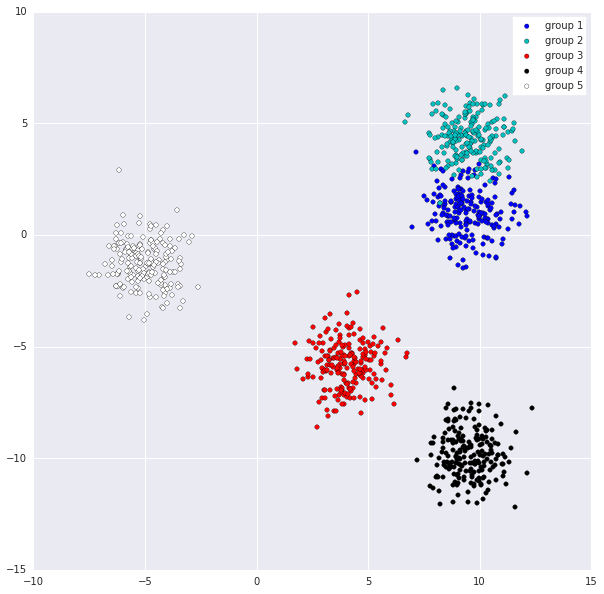

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Plot data
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (10.0, 10.0)
group1 = plt.scatter(df['feature 1'].ix[0], df['feature 2'].ix[0], c='b', label='group 1')
group2 = plt.scatter(df['feature 1'].ix[1], df['feature 2'].ix[1], c='c', label='group 2')
group3 = plt.scatter(df['feature 1'].ix[2], df['feature 2'].ix[2], c='r', label='group 3')
group4 = plt.scatter(df['feature 1'].ix[3], df['feature 2'].ix[3], c='k', label='group 4')
group5 = plt.scatter(df['feature 1'].ix[4], df['feature 2'].ix[4], c='w', label='group 5')
legend = plt.legend(handles=[group1,group2,group3,group4,group5], frameon=1)
legend.get_frame().set_facecolor('#ffffff')
plt.show()

In [117]:
from sklearn import neighbors, datasets

# Create KNN classifier and fit model
X, y = df.values, df.index
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Predict group membership based values entered in predict fucntion
print ['Group 1','Group 2','Group 3','Group 4','Group 5'][knn.predict([[10, -2]])]

Group 1


(-8.5836579418467149,
 13.429108903374086,
 -13.214788336796849,
 7.6022865831312405)

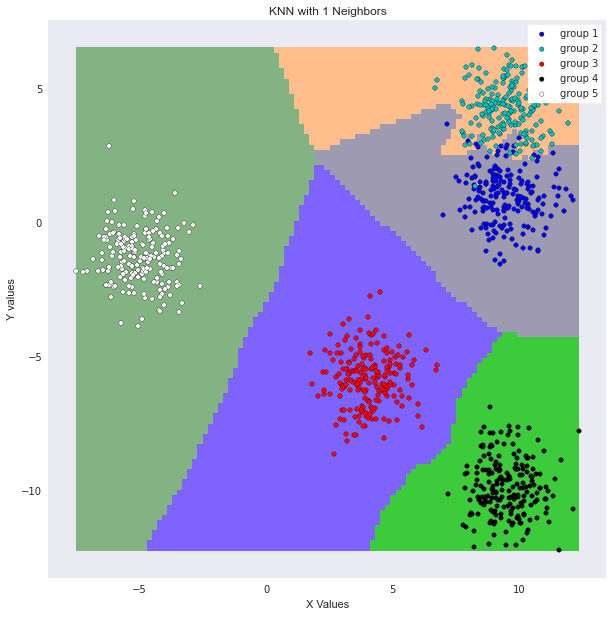

In [120]:
import numpy as np
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Set up colors for mesh
mesh_cmap = ListedColormap(['#9E9AB2', '#FFBE8C', '#7F63FF', '#3CCC3B', '#83B283'])

# Set up KNN for plotting
k_neigh = 1 # Must be odd
knn = neighbors.KNeighborsClassifier(n_neighbors=k_neigh)

# Reassign dataframe to raw variables for illustration
X = df.values
y = df.index

# Fit the model using X as training data and y as target values
knn.fit(X, y)

# Set up array for plotting predictions
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure()
plt.title('KNN with {} Neighbors'.format(k_neigh))
plt.pcolormesh(xx, yy, Z, cmap=mesh_cmap)
group1 = plt.scatter(df['feature 1'].ix[0], df['feature 2'].ix[0], c='b', label='group 1')
group2 = plt.scatter(df['feature 1'].ix[1], df['feature 2'].ix[1], c='c', label='group 2')
group3 = plt.scatter(df['feature 1'].ix[2], df['feature 2'].ix[2], c='r', label='group 3')
group4 = plt.scatter(df['feature 1'].ix[3], df['feature 2'].ix[3], c='k', label='group 4')
group5 = plt.scatter(df['feature 1'].ix[4], df['feature 2'].ix[4], c='w', label='group 5')
legend = plt.legend(handles=[group1,group2,group3,group4,group5], frameon=1)
legend.get_frame().set_facecolor('#ffffff')
sns.set_style("darkgrid")
plt.xlabel('X Values')
plt.ylabel('Y values')
plt.axis('tight')

In [ ]:
Z

In [ ]:
plot_iris_classification(neighbors.KNeighborsClassifier, n_neighbors=3)


In [ ]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [112]:
X2, y2 = make_blobs(n_samples=1000, centers=5, n_features=3,
                  random_state=4)
df2 = pd.DataFrame(data=X2, index=y2, columns=['feature 1', 'feature 2', 'feature 3'])

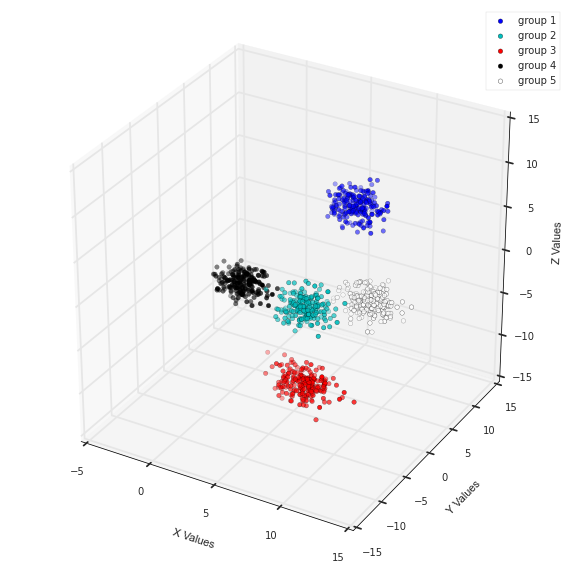

In [113]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
mpl.rcParams['figure.figsize'] = (10.0, 10.0)
fig = plt.figure('3D')
ax = fig.add_subplot(111, projection='3d')
group1 = ax.scatter(df2['feature 1'].ix[0], df2['feature 2'].ix[0], df2['feature 3'].ix[0], c='b', label='group 1')
group2 = ax.scatter(df2['feature 1'].ix[1], df2['feature 2'].ix[1], df2['feature 3'].ix[1], c='c', label='group 2')
group3 = ax.scatter(df2['feature 1'].ix[2], df2['feature 2'].ix[2], df2['feature 3'].ix[2], c='r', label='group 3')
group4 = ax.scatter(df2['feature 1'].ix[3], df2['feature 2'].ix[3], df2['feature 3'].ix[3], c='k', label='group 4')
group5 = ax.scatter(df2['feature 1'].ix[4], df2['feature 2'].ix[4], df2['feature 3'].ix[4], c='w', label='group 5')
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
ax.set_zlabel('Z Values')
legend = plt.legend(handles=[group1,group2,group3,group4,group5], frameon=1)
legend.get_frame().set_facecolor('#ffffff')
plt.show()

In [111]:
knn.fit(X2, y2)
print ['Group 1','Group 2','Group 3','Group 4','Group 5'][knn.predict([[10, -2, 4]])]

Group 2


In [105]:
X3, y3 = make_blobs(n_samples=1000, centers=5, n_features=5,
                  random_state=0)
df3 = pd.DataFrame(data=X3, index=y3, columns=['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5'])

In [106]:
knn.fit(X3, y3)
print ['Group 1','Group 2','Group 3','Group 4','Group 5'][knn.predict([[10, -2, 4, 5, 6]])]

Group 2
